# 1. Завантаження бібліотек, даних та знайомство з даними

In [2]:
from google.cloud import bigquery
from matplotlib import pyplot as plt
import datetime as dt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings

# Вказуємо шлях до JSON-файлу з ключем до Google Cloud
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "data-analytics-course-448117-2197d7e00ac5.json"

# Підключаємося до BigQuery
client = bigquery.Client(location='US')

In [3]:
# Вимикаємо повідомлень про попередження
warnings.filterwarnings("ignore")

In [4]:
# Створюємо функцію для виконання SQL-запиту, перетворення результату в DataFrame та його виведення
def execute_and_print_query(query: str) -> pd.DataFrame:
   query_job = client.query(query)
   df = query_job.to_dataframe()
   display(df)
   return df

In [5]:
# Переглянемо, які є таблички в обраному датасеті
dataset_ref = client.dataset("thelook_ecommerce", project="bigquery-public-data")
tables = list(client.list_tables(dataset_ref))

for table in tables:
    print(table.table_id)

distribution_centers
events
inventory_items
order_items
orders
products
users


### Для кожної з таблиць в датасеті проведемо такі операції  

1.1. Виведемо 5 записів для знайомства з даними  
1.2. Виведемо типи даних для кожної колонки в таблиці  
1.3. Перевіримо дані в таблиці на пропущені значення  
1.4. Перевіримо дані в таблиці на дублікати  
1.5. Перевіримо числові (грошові) поля на їх невід'ємність  

## 1.1. Виведемо 5 записів для знайомства з даними  

### 1.1.1. distribution_centers

In [6]:
query_dc = """
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.distribution_centers`
LIMIT 5;
"""

df_dc = execute_and_print_query(query_dc)

,id,name,latitude,longitude,distribution_center_geom
0,6,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834,POINT(-73.7834 40.634)
1,4,Los Angeles CA,34.0500,-118.2500,POINT(-118.25 34.05)
2,3,Houston TX,29.7604,-95.3698,POINT(-95.3698 29.7604)
3,7,Philadelphia PA,39.9500,-75.1667,POINT(-75.1667 39.95)
4,8,Mobile AL,30.6944,-88.0431,POINT(-88.0431 30.6944)


### 1.1.2. events

In [7]:
query_events = """
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.events`
LIMIT 5;
"""

df_events = execute_and_print_query(query_events)

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,2043054,<NA>,3,1c110e56-0bb0-4cad-b6f9-90cf09f6e667,2024-10-19 12:54:00+00:00,86.151.171.36,Sapporo,Hokkaido,003-0021,Chrome,Email,/cancel,cancel
1,2358107,<NA>,3,e8c9e29a-31e1-45dc-a9d2-74029565782b,2019-10-04 13:30:00+00:00,169.108.6.213,Sapporo,Hokkaido,005-0849,Chrome,Adwords,/cancel,cancel
2,1611436,<NA>,3,4374b3aa-ba30-4596-87d0-81ec95cfab71,2021-02-24 14:32:00+00:00,44.8.21.37,São Paulo,São Paulo,02220-000,Safari,Adwords,/cancel,cancel
3,1824789,<NA>,3,78192087-c358-4218-9510-f8b38f7aac63,2023-03-13 09:21:00+00:00,146.189.160.222,São Paulo,São Paulo,02675-031,Other,Organic,/cancel,cancel
4,2242277,<NA>,3,96ff332c-672c-4624-9046-cd5d307d4ad1,2022-07-30 10:45:00+00:00,161.53.209.232,São Paulo,São Paulo,02675-031,Safari,Email,/cancel,cancel


### 1.1.3. inventory_items

In [8]:
query_inventory = """
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.inventory_items`
LIMIT 5;
"""

df_inventory = execute_and_print_query(query_inventory)

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,26399,13844,2023-04-30 12:08:19+00:00,2023-05-14 00:02:19+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,26400,13844,2025-02-09 00:38:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,63191,13844,2021-12-02 21:41:40+00:00,2022-01-12 12:19:40+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,63192,13844,2021-06-18 14:11:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,63193,13844,2021-05-17 02:24:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


### 1.1.4. order_items

In [9]:
query_order_items = """
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.order_items`
LIMIT 5;
"""

df_order_items = execute_and_print_query(query_order_items)

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,166026,114373,91199,14235,448486,Cancelled,2025-02-26 11:12:40+00:00,NaT,NaT,NaT,0.02
1,36767,25401,20323,14235,99390,Complete,2025-03-28 00:15:03.231856+00:00,2025-03-30 10:12:48.231856+00:00,2025-03-31 04:37:48.231856+00:00,NaT,0.02
2,99367,68535,54693,14235,268554,Complete,2023-06-28 14:51:20+00:00,2023-06-28 16:24:00+00:00,2023-07-01 22:56:00+00:00,NaT,0.02
3,137148,94487,75350,14235,370539,Complete,2024-05-21 16:22:05+00:00,2024-05-23 05:18:00+00:00,2024-05-25 16:18:00+00:00,NaT,0.02
4,154643,106515,84957,14235,417840,Complete,2025-02-06 13:48:17+00:00,2025-02-06 09:03:00+00:00,2025-02-07 21:42:00+00:00,NaT,0.02


### 1.1.5. orders

In [10]:
query_orders = """
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.orders`
LIMIT 5;
"""

df_orders = execute_and_print_query(query_orders)

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,3,5,Cancelled,F,2021-10-25 02:46:00+00:00,NaT,NaT,NaT,1
1,21,25,Cancelled,F,2024-08-24 00:00:00+00:00,NaT,NaT,NaT,1
2,28,29,Cancelled,F,2021-07-17 16:52:00+00:00,NaT,NaT,NaT,1
3,29,29,Cancelled,F,2022-12-23 16:52:00+00:00,NaT,NaT,NaT,1
4,33,31,Cancelled,F,2023-08-12 08:43:00+00:00,NaT,NaT,NaT,2


### 1.1.6. products

In [11]:
query_products = """
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.products`
LIMIT 5;
"""

df_products = execute_and_print_query(query_products)

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1


### 1.1.7. users

In [12]:
query_users = """
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.users`
LIMIT 5;
"""

df_users = execute_and_print_query(query_users)

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at,user_geom
0,74275,Gregory,Sanchez,gregorysanchez@example.net,19,M,Acre,6286 Tara Stream Apt. 603,69980-000,null,Brasil,-8.065346,-72.870949,Facebook,2022-06-28 09:16:00+00:00,POINT(-72.87094866 -8.065346116)
1,53896,Matthew,Gordon,matthewgordon@example.org,52,M,Acre,5456 Jennifer Harbor,69980-000,null,Brasil,-8.065346,-72.870949,Search,2024-03-26 04:46:00+00:00,POINT(-72.87094866 -8.065346116)
2,75497,Valerie,Martinez,valeriemartinez@example.com,53,F,Acre,00169 Jackson Mill,69980-000,null,Brasil,-8.065346,-72.870949,Search,2019-03-28 15:10:00+00:00,POINT(-72.87094866 -8.065346116)
3,13322,Patrick,Williams,patrickwilliams@example.net,21,M,Acre,23073 Steven Hollow Suite 589,69980-000,null,Brasil,-8.065346,-72.870949,Display,2022-07-22 11:42:00+00:00,POINT(-72.87094866 -8.065346116)
4,92727,Colton,Sanchez,coltonsanchez@example.org,56,M,Acre,6706 Michael Circles Apt. 623,69980-000,null,Brasil,-8.065346,-72.870949,Organic,2023-06-25 18:02:00+00:00,POINT(-72.87094866 -8.065346116)


## 1.2. Виведемо типи даних для кожної колонки в таблиці

### 1.2.1. distribution_centers

In [13]:
query_dt_1 = """
SELECT column_name, data_type
FROM `bigquery-public-data.thelook_ecommerce.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'distribution_centers'
"""

df_dt_1 = execute_and_print_query(query_dt_1)

,column_name,data_type
0,id,INT64
1,name,STRING
2,latitude,FLOAT64
3,longitude,FLOAT64
4,distribution_center_geom,GEOGRAPHY


### 1.2.2. events

In [14]:
query_dt_2 = """
SELECT column_name, data_type
FROM `bigquery-public-data.thelook_ecommerce.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'events'
"""

df_dt_2 = execute_and_print_query(query_dt_2)

,column_name,data_type
0,id,INT64
1,user_id,INT64
2,sequence_number,INT64
3,session_id,STRING
4,created_at,TIMESTAMP
5,ip_address,STRING
6,city,STRING
7,state,STRING
8,postal_code,STRING
9,browser,STRING


### 1.2.3. inventory_items

In [15]:
# 2. Знайомство з типами даних
query_dt_3 = """
SELECT column_name, data_type
FROM `bigquery-public-data.thelook_ecommerce.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'inventory_items'
"""

df_dt_3 = execute_and_print_query(query_dt_3)

,column_name,data_type
0,id,INT64
1,product_id,INT64
2,created_at,TIMESTAMP
3,sold_at,TIMESTAMP
4,cost,FLOAT64
5,product_category,STRING
6,product_name,STRING
7,product_brand,STRING
8,product_retail_price,FLOAT64
9,product_department,STRING


### 1.2.4. order_items

In [16]:
query_dt_4 = """
SELECT column_name, data_type
FROM `bigquery-public-data.thelook_ecommerce.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'order_items'
"""

df_dt_4 = execute_and_print_query(query_dt_4)

,column_name,data_type
0,id,INT64
1,order_id,INT64
2,user_id,INT64
3,product_id,INT64
4,inventory_item_id,INT64
5,status,STRING
6,created_at,TIMESTAMP
7,shipped_at,TIMESTAMP
8,delivered_at,TIMESTAMP
9,returned_at,TIMESTAMP


### 1.2.5. orders

In [17]:
query_dt_5 = """
SELECT column_name, data_type
FROM `bigquery-public-data.thelook_ecommerce.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'orders'
"""

df_dt_5 = execute_and_print_query(query_dt_5)

,column_name,data_type
0,order_id,INT64
1,user_id,INT64
2,status,STRING
3,gender,STRING
4,created_at,TIMESTAMP
5,returned_at,TIMESTAMP
6,shipped_at,TIMESTAMP
7,delivered_at,TIMESTAMP
8,num_of_item,INT64


### 1.2.6. products

In [18]:
query_dt_6 = """
SELECT column_name, data_type
FROM `bigquery-public-data.thelook_ecommerce.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'products'
"""

df_dt_6 = execute_and_print_query(query_dt_6)

,column_name,data_type
0,id,INT64
1,cost,FLOAT64
2,category,STRING
3,name,STRING
4,brand,STRING
5,retail_price,FLOAT64
6,department,STRING
7,sku,STRING
8,distribution_center_id,INT64


### 1.2.7. users

In [19]:
query_dt_7 = """
SELECT column_name, data_type
FROM `bigquery-public-data.thelook_ecommerce.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'users'
"""

df_dt_7 = execute_and_print_query(query_dt_7)

,column_name,data_type
0,id,INT64
1,first_name,STRING
2,last_name,STRING
3,email,STRING
4,age,INT64
5,gender,STRING
6,state,STRING
7,street_address,STRING
8,postal_code,STRING
9,city,STRING


## 1.3. Перевіримо дані в таблиці на пропущені значення 

### 1.3.1. distribution_centers

In [20]:
query_null_dc  = """
SELECT
    SUM(CASE WHEN name IS NULL THEN 1 ELSE 0 END) AS null_in_name,
    SUM(CASE WHEN latitude IS NULL THEN 1 ELSE 0 END) AS null_in_latitude,
    SUM(CASE WHEN longitude IS NULL THEN 1 ELSE 0 END) AS null_in_longtitude,
    SUM(CASE WHEN distribution_center_geom IS NULL THEN 1 ELSE 0 END) AS null_in_distribution_center_geom,
FROM `bigquery-public-data.thelook_ecommerce.distribution_centers`;
"""

df_null_dc = execute_and_print_query(query_null_dc)

,null_in_name,null_in_latitude,null_in_longtitude,null_in_distribution_center_geom
0,0,0,0,0


### 1.3.2. events

In [21]:
query_null_events  = """
SELECT
    SUM(CASE WHEN user_id IS NULL THEN 1 ELSE 0 END) AS null_in_user_id,
    SUM(CASE WHEN sequence_number IS NULL THEN 1 ELSE 0 END) AS null_in_sequence_number,
    SUM(CASE WHEN session_id IS NULL THEN 1 ELSE 0 END) AS null_in_session_id,
    SUM(CASE WHEN created_at IS NULL THEN 1 ELSE 0 END) AS null_in_created_at,
    SUM(CASE WHEN ip_address IS NULL THEN 1 ELSE 0 END) AS null_in_ip_address,
    SUM(CASE WHEN city IS NULL THEN 1 ELSE 0 END) AS null_in_city,
    SUM(CASE WHEN state IS NULL THEN 1 ELSE 0 END) AS null_in_state,
    SUM(CASE WHEN postal_code IS NULL THEN 1 ELSE 0 END) AS null_in_postal_code,
    SUM(CASE WHEN browser IS NULL THEN 1 ELSE 0 END) AS null_in_browser,
    SUM(CASE WHEN traffic_source IS NULL THEN 1 ELSE 0 END) AS null_in_traffic_source,
    SUM(CASE WHEN uri IS NULL THEN 1 ELSE 0 END) AS null_in_uri,
    SUM(CASE WHEN event_type IS NULL THEN 1 ELSE 0 END) AS null_in_event_type,
FROM `bigquery-public-data.thelook_ecommerce.events`;
"""

df_null_events = execute_and_print_query(query_null_events)

,null_in_user_id,null_in_sequence_number,null_in_session_id,null_in_created_at,null_in_ip_address,null_in_city,null_in_state,null_in_postal_code,null_in_browser,null_in_traffic_source,null_in_uri,null_in_event_type
0,1125336,0,0,0,0,0,0,0,0,0,0,0


Пропущено значення для user_id - скоріш за все через те, що активність трекається по сесіям. В рамках аналізу ці пропущені значення можна ігнорувати.

### 1.3.3. inventory_items

In [22]:
query_null_invetory  = """
SELECT
    SUM(CASE WHEN product_id IS NULL THEN 1 ELSE 0 END) AS null_in_product_id,
    SUM(CASE WHEN created_at IS NULL THEN 1 ELSE 0 END) AS null_in_created_at,
    SUM(CASE WHEN sold_at IS NULL THEN 1 ELSE 0 END) AS null_in_sold_at,
    SUM(CASE WHEN cost IS NULL THEN 1 ELSE 0 END) AS null_in_cost,
    SUM(CASE WHEN product_category IS NULL THEN 1 ELSE 0 END) AS null_in_product_category,
    SUM(CASE WHEN product_name IS NULL THEN 1 ELSE 0 END) AS null_product_name,
    SUM(CASE WHEN product_brand IS NULL THEN 1 ELSE 0 END) AS null_in_product_brand,
    SUM(CASE WHEN product_retail_price IS NULL THEN 1 ELSE 0 END) AS null_in_product_retail_price,
    SUM(CASE WHEN product_department IS NULL THEN 1 ELSE 0 END) AS null_in_product_department,
    SUM(CASE WHEN product_sku IS NULL THEN 1 ELSE 0 END) AS null_in_product_sku,
    SUM(CASE WHEN product_distribution_center_id IS NULL THEN 1 ELSE 0 END) AS null_in_product_distribution_center_id,
FROM `bigquery-public-data.thelook_ecommerce.inventory_items`;
"""

df_null_invetory = execute_and_print_query(query_null_invetory)

,null_in_product_id,null_in_created_at,null_in_sold_at,null_in_cost,null_in_product_category,null_product_name,null_in_product_brand,null_in_product_retail_price,null_in_product_department,null_in_product_sku,null_in_product_distribution_center_id
0,0,0,309690,0,0,0,0,0,0,0,0


Як бачимо є пропущені значення для колонки sold_at - це скоріш за все пов'язано з тим, що не всі айтеми були розпродані зі складу

### 1.3.4. order_items

In [23]:
query_null_order_items  = """
SELECT
    SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS null_in_order_id,
    SUM(CASE WHEN user_id IS NULL THEN 1 ELSE 0 END) AS null_in_user_id,
    SUM(CASE WHEN product_id IS NULL THEN 1 ELSE 0 END) AS null_in_product_id,
    SUM(CASE WHEN inventory_item_id IS NULL THEN 1 ELSE 0 END) AS null_in_inventory_item_id,
    SUM(CASE WHEN status IS NULL THEN 1 ELSE 0 END) AS null_in_status,
    SUM(CASE WHEN created_at IS NULL THEN 1 ELSE 0 END) AS null_created_at,
    SUM(CASE WHEN shipped_at IS NULL THEN 1 ELSE 0 END) AS null_in_shipped_at,
    SUM(CASE WHEN delivered_at IS NULL THEN 1 ELSE 0 END) AS null_in_delivered_at,
    SUM(CASE WHEN returned_at IS NULL THEN 1 ELSE 0 END) AS null_in_returned_at,
    SUM(CASE WHEN sale_price IS NULL THEN 1 ELSE 0 END) AS null_in_sale_price,
FROM `bigquery-public-data.thelook_ecommerce.order_items`;
"""

df_null_order_items = execute_and_print_query(query_null_order_items)

,null_in_order_id,null_in_user_id,null_in_product_id,null_in_inventory_item_id,null_in_status,null_created_at,null_in_shipped_at,null_in_delivered_at,null_in_returned_at,null_in_sale_price
0,0,0,0,0,0,0,63635,118748,164077,0


Бачимо, що є багато відсутніх значень в колонках `shipped_at` & `delivered_at` & `returned_at` - дані з цих колонок НЕ будемо використовувати в аналізі

### 1.3.5. orders

In [24]:
query_null_orders  = """
SELECT
    SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS null_in_order_id,
    SUM(CASE WHEN user_id IS NULL THEN 1 ELSE 0 END) AS null_in_user_id,
    SUM(CASE WHEN status IS NULL THEN 1 ELSE 0 END) AS null_in_status,
    SUM(CASE WHEN gender IS NULL THEN 1 ELSE 0 END) AS null_in_gender,
    SUM(CASE WHEN created_at IS NULL THEN 1 ELSE 0 END) AS null_in_created_at,
    SUM(CASE WHEN returned_at IS NULL THEN 1 ELSE 0 END) AS null_returned_at,
    SUM(CASE WHEN shipped_at IS NULL THEN 1 ELSE 0 END) AS null_in_shipped_at,
    SUM(CASE WHEN delivered_at IS NULL THEN 1 ELSE 0 END) AS null_in_delivered_at,
    SUM(CASE WHEN num_of_item IS NULL THEN 1 ELSE 0 END) AS null_in_num_of_item,
FROM `bigquery-public-data.thelook_ecommerce.orders`;
"""

df_null_orders = execute_and_print_query(query_null_orders)

,null_in_order_id,null_in_user_id,null_in_status,null_in_gender,null_in_created_at,null_returned_at,null_in_shipped_at,null_in_delivered_at,null_in_num_of_item
0,0,0,0,0,0,112947,43776,81825,0


Відсутні значення для схожих колонок як і в таблиці `order_items` - ці дані не будемо брати до уваги під час аналізу.

### 1.3.6. products

In [25]:
query_null_products  = """
SELECT
    SUM(CASE WHEN cost IS NULL THEN 1 ELSE 0 END) AS null_in_cost,
    SUM(CASE WHEN category IS NULL THEN 1 ELSE 0 END) AS null_in_category,
    SUM(CASE WHEN name IS NULL THEN 1 ELSE 0 END) AS null_in_name,
    SUM(CASE WHEN brand IS NULL THEN 1 ELSE 0 END) AS null_in_brand,
    SUM(CASE WHEN retail_price IS NULL THEN 1 ELSE 0 END) AS null_in_retail_price,
    SUM(CASE WHEN department IS NULL THEN 1 ELSE 0 END) AS null_department,
    SUM(CASE WHEN sku IS NULL THEN 1 ELSE 0 END) AS null_in_sku,
    SUM(CASE WHEN distribution_center_id IS NULL THEN 1 ELSE 0 END) AS null_in_distribution_center_id,
FROM `bigquery-public-data.thelook_ecommerce.products`;
"""

df_null_products = execute_and_print_query(query_null_products)

,null_in_cost,null_in_category,null_in_name,null_in_brand,null_in_retail_price,null_department,null_in_sku,null_in_distribution_center_id
0,0,0,2,24,0,0,0,0


24 продукти не мають бренду - можна створити категорію Other та заасайнити її на ті продукти, в яких brand IS NULL

In [26]:
# Так як апдейтнути дані в BigQuery не вийшло, то створюю додаткову колонку, в якій пропущені занчені будуть замінені на "Other"
update_products = """
SELECT
    name,
    brand, 
    category,
    COALESCE(brand, 'Other') AS brand_cleaned
FROM `bigquery-public-data.thelook_ecommerce.products`;
"""

df_updated_products = execute_and_print_query(update_products)

,name,brand,category,brand_cleaned
0,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,Accessories,MG
1,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,Accessories,MG
2,Enzyme Regular Solid Army Caps-Black W35S45D,MG,Accessories,MG
3,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,Accessories,MG
4,Washed Canvas Ivy Cap - Black W11S64C,MG,Accessories,MG
...,...,...,...,...
29115,WHAT GOES AROUND COMES AROUND Women's Colette ...,What Goes Around Comes Around,Pants & Capris,What Goes Around Comes Around
29116,WHAT GOES AROUND COMES AROUND Women's Mimi Shorts,What Goes Around Comes Around,Shorts,What Goes Around Comes Around
29117,WHAT GOES AROUND COMES AROUND Women's Fifi Short,What Goes Around Comes Around,Shorts,What Goes Around Comes Around
29118,WHAT GOES AROUND COMES AROUND Women's Ferguson...,What Goes Around Comes Around,Shorts,What Goes Around Comes Around


### 1.3.7. users

In [27]:
# 3. Перевіряємо на пропущені значення
query_null_users  = """
SELECT
    SUM(CASE WHEN first_name IS NULL THEN 1 ELSE 0 END) AS null_in_first_name,
    SUM(CASE WHEN last_name IS NULL THEN 1 ELSE 0 END) AS null_in_last_name,
    SUM(CASE WHEN email IS NULL THEN 1 ELSE 0 END) AS null_in_email,
    SUM(CASE WHEN age IS NULL THEN 1 ELSE 0 END) AS null_in_age,
    SUM(CASE WHEN gender IS NULL THEN 1 ELSE 0 END) AS null_in_gender,
    SUM(CASE WHEN state IS NULL THEN 1 ELSE 0 END) AS null_state,
    SUM(CASE WHEN street_address IS NULL THEN 1 ELSE 0 END) AS null_in_street_address,
    SUM(CASE WHEN city IS NULL THEN 1 ELSE 0 END) AS null_in_city,
    SUM(CASE WHEN country IS NULL THEN 1 ELSE 0 END) AS null_in_country,
    SUM(CASE WHEN latitude IS NULL THEN 1 ELSE 0 END) AS null_in_latitude,
    SUM(CASE WHEN longitude IS NULL THEN 1 ELSE 0 END) AS null_in_longitude,
    SUM(CASE WHEN traffic_source IS NULL THEN 1 ELSE 0 END) AS null_in_traffic_source,
    SUM(CASE WHEN created_at IS NULL THEN 1 ELSE 0 END) AS null_in_created_at,
    SUM(CASE WHEN user_geom IS NULL THEN 1 ELSE 0 END) AS null_user_geom,
FROM `bigquery-public-data.thelook_ecommerce.users`;
"""

df_null_users = execute_and_print_query(query_null_users)

,null_in_first_name,null_in_last_name,null_in_email,null_in_age,null_in_gender,null_state,null_in_street_address,null_in_city,null_in_country,null_in_latitude,null_in_longitude,null_in_traffic_source,null_in_created_at,null_user_geom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 1.4. Перевіримо дані в таблиці на дублікати  

### 1.4.1. distribution_centers

In [28]:
query_duplicates_dc = """
SELECT
    name,
    latitude,
    longitude,
    COUNT(*) AS Duplicate_Count
FROM `bigquery-public-data.thelook_ecommerce.distribution_centers`
GROUP BY
    name,
    latitude,
    longitude
HAVING COUNT(*) > 1
ORDER BY Duplicate_Count DESC;
"""

df_duplicates_dc = execute_and_print_query(query_duplicates_dc)

,name,latitude,longitude,Duplicate_Count


### 1.4.2. events

In [29]:
# 4. Перевіряємо на дублікати
query_duplicates_events = """
SELECT
    sequence_number,
    session_id,
    created_at,
    ip_address,
    city,
    state,
    postal_code,
    browser,
    traffic_source,
    uri,
    event_type,
    COUNT(*) AS Duplicate_Count
FROM `bigquery-public-data.thelook_ecommerce.events`
GROUP BY
    sequence_number,
    session_id,
    created_at,
    ip_address,
    city,
    state,
    postal_code,
    browser,
    traffic_source,
    uri,
    event_type
HAVING COUNT(*) > 1
ORDER BY Duplicate_Count DESC;
"""

df_duplicates_events = execute_and_print_query(query_duplicates_events)

,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type,Duplicate_Count


### 1.4.3. inventory_items

In [30]:
query_duplicates_inventory = """
SELECT
    product_id,
    created_at,
    sold_at,
    cost,
    product_category,
    product_name,
    product_brand,
    product_retail_price,
    product_department,
    product_sku,
    product_distribution_center_id,
    COUNT(*) AS Duplicate_Count
FROM `bigquery-public-data.thelook_ecommerce.inventory_items`
GROUP BY
    product_id,
    created_at,
    sold_at,
    cost,
    product_category,
    product_name,
    product_brand,
    product_retail_price,
    product_department,
    product_sku,
    product_distribution_center_id
HAVING COUNT(*) > 1
ORDER BY Duplicate_Count DESC;
"""

df_duplicates_inventory = execute_and_print_query(query_duplicates_inventory)

,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id,Duplicate_Count


Знайдено 1 запис, який дублюється в табличці. Оскільки ця таблиця буде використовуватись для пошуку товарів за айді - ці дублікати можна наразі проігнорувати.

### 1.4.4. order_items

In [31]:
query_duplicates_order_items = """
SELECT
    order_id,
    user_id,
    product_id,
    inventory_item_id,
    status,
    created_at,
    shipped_at,
    delivered_at,
    sale_price,
    COUNT(*) AS Duplicate_Count
FROM `bigquery-public-data.thelook_ecommerce.order_items`
GROUP BY
    order_id,
    user_id,
    product_id,
    inventory_item_id,
    status,
    created_at,
    shipped_at,
    delivered_at,
    sale_price
HAVING COUNT(*) > 1
ORDER BY Duplicate_Count DESC;
"""

df_duplicates_order_items = execute_and_print_query(query_duplicates_order_items)

,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,sale_price,Duplicate_Count


### 1.4.5. orders

In [32]:
query_duplicates_orders = """
SELECT
    order_id,
    user_id,
    status,
    gender,
    returned_at,
    created_at,
    shipped_at,
    delivered_at,
    num_of_item,
    COUNT(*) AS Duplicate_Count
FROM `bigquery-public-data.thelook_ecommerce.orders`
GROUP BY
    order_id,
    user_id,
    status,
    gender,
    returned_at,
    created_at,
    shipped_at,
    delivered_at,
    num_of_item
HAVING COUNT(*) > 1
ORDER BY Duplicate_Count DESC;
"""

df_duplicates_orders = execute_and_print_query(query_duplicates_orders)

,order_id,user_id,status,gender,returned_at,created_at,shipped_at,delivered_at,num_of_item,Duplicate_Count


### 1.4.6. products

In [33]:
query_duplicates_products = """
SELECT
    cost,
    category,
    name,
    brand,
    retail_price,
    department,
    sku,
    distribution_center_id,
    COUNT(*) AS Duplicate_Count
FROM `bigquery-public-data.thelook_ecommerce.products`
GROUP BY
    cost,
    category,
    name,
    brand,
    retail_price,
    department,
    sku,
    distribution_center_id
HAVING COUNT(*) > 1
ORDER BY Duplicate_Count DESC;
"""

df_duplicates_products = execute_and_print_query(query_duplicates_products)

,cost,category,name,brand,retail_price,department,sku,distribution_center_id,Duplicate_Count


### 1.4.7. users

In [34]:
# 4. Перевіряємо на дублікати
query_duplicates_users = """
SELECT
    first_name,
    last_name,
    email,
    age,
    gender,
    state,
    street_address,
    postal_code,
    city,
    country,
    latitude,
    longitude,
    traffic_source,
    created_at,
    COUNT(*) AS Duplicate_Count
FROM `bigquery-public-data.thelook_ecommerce.users`
GROUP BY
    first_name,
    last_name,
    email,
    age,
    gender,
    state,
    street_address,
    postal_code,
    city,
    country,
    latitude,
    longitude,
    traffic_source,
    created_at
HAVING COUNT(*) > 1
ORDER BY Duplicate_Count DESC;
"""

df_duplicates_users = execute_and_print_query(query_duplicates_users)

,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at,Duplicate_Count


## 1.5. Перевіримо числові (грошові) поля на їх невід'ємність  

### 1.5.1. distribution_centers

In [35]:
# Перевірка на невід'ємність даних для цієї таблиці непотрібна, оскільки таблиця не містить грошових виразів, які братимуть участь у подальших обчисленнях

### 1.5.2. events

In [36]:
# Перевірка на невід'ємність даних для цієї таблиці непотрібна, оскільки таблиця не містить грошових виразів, які братимуть участь у подальших обчисленнях

### 1.5.3. inventory_items

In [37]:
query_negative_inventory = """
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.inventory_items`
WHERE cost < 0 OR product_retail_price < 0;
"""

df_negative_inventory = execute_and_print_query(query_negative_inventory)

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id


### 1.5.4. order_items

In [38]:
query_negative_order_items = """
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.order_items`
WHERE sale_price < 0;
"""

df_negative_order_items = execute_and_print_query(query_negative_order_items)

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price


### 1.5.5. orders

In [39]:
query_negative_orders = """
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.orders`
WHERE num_of_item < 0;
"""

df_negative_orders = execute_and_print_query(query_negative_orders)

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item


### 1.5.6. products

In [40]:
query_negative_products = """
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.products`
WHERE cost < 0 OR retail_price < 0;
"""

df_negative_products = execute_and_print_query(query_negative_products)

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id


### 1.5.7. users

In [41]:
query_negative_users = """
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.users`
WHERE age < 0;
"""

df_negative_users = execute_and_print_query(query_negative_users)

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at,user_geom


# 2. Аналіз даних

### 2.1. Який географічний розподіл наших юзерів?

,country,user_number
0,China,33668
1,United States,22709
2,Brasil,14486
3,South Korea,5405
4,France,4682
5,United Kingdom,4546
6,Germany,4211
7,Spain,4037
8,Japan,2494
9,Australia,2221


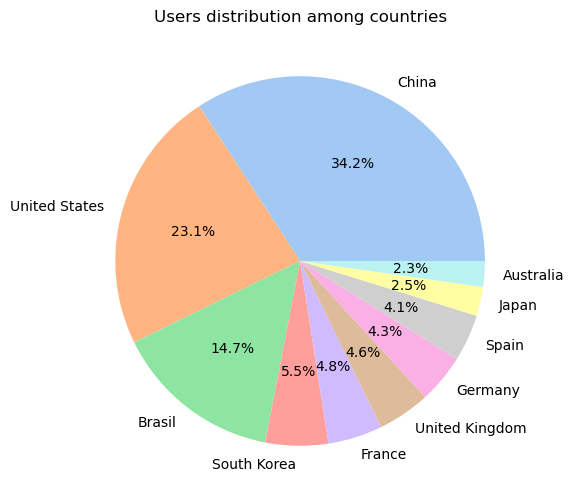

In [42]:
# Підрахуємо скільки юзерів знаходяться в кожній країні та виділимо топ-10 країн
query_1 = """
SELECT
    country,
    COUNT(id) AS user_number
FROM `bigquery-public-data.thelook_ecommerce.users`
GROUP BY country
ORDER BY user_number DESC
LIMIT 10;
"""

df_1 = execute_and_print_query(query_1)

plt.figure(figsize=(10, 6))
plt.pie(df_1['user_number'], labels=df_1['country'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Users distribution among countries')
plt.show()

Аналізуючи топ-10 країн за кількістю користувачів, можна зробити кілька важливих висновків:

1. Китай - лідер серед усіх країн.
Різниця між Китаєм та другою країною (США) досить значна - це вказує на високий рівень залучення китайських користувачів, можливо, через:
  - локалізовані маркетингові кампанії;  
  - відповідність продукту вподобанням китайської аудиторії;  
  - ефективну стратегію залучення через популярні китайські платформи (WeChat, Baidu, Weibo тощо).  
Важливо перевірити, чи є в Китаї високий рівень монетизації, адже велика база користувачів не завжди означає високі доходи.  

2. США займають друге місце, але з помітним відставанням від Китаю.
Оскільки американські користувачі часто мають вищий рівень платоспроможності, може бути доцільним зосередитись на монетизації та збільшенні середнього чеку.
Важливо дослідити:
  - Чи приносять американські користувачі більше доходу в порівнянні з китайськими?  
  - Які рекламні канали приносять найбільше американських користувачів?  

3. Бразилія займає третє місце і значно випереджає європейські країни. Можливі причини:
  - Висока популярність онлайн-шопінгу.  
  - Успішні партнерські програми або соцмережеві кампанії.  
Варто проаналізувати конверсію та середній чек користувачів у Бразилії.

4. Європейські країни (Франція, Німеччина, Іспанія, Великобританія) мають відносно невисоку кількість користувачів.  
Це може бути пов'язано з проблемами локалізації, менш активними рекламними кампаніями. 
Якщо монетизація в цих країнах висока – можна сфокусуватися на залученні нових користувачів.

5. Японія та Австралія – порівняно слабкі ринки. Це може свідчити про:
  - Низький рівень впізнаваності бренду.  
  - Високу конкуренцію або обмежений ринок.  
Варто оцінити доцільність інвестицій у маркетинг в цих країнах.

### 2.2. Для відповіді на вище зазначені питання, давайте дізнаємося, яка виручка припадає на кожну країну, який тип трафіку найбільш популярний та який середній чек в кожній країні

In [43]:
# Для підрахунку загальної виручки брала до уваги тільки ті замовлення, які вже виконані (status = "Complete")

query_details = """
WITH revenue_per_country AS (
    SELECT
        u.country,
        ROUND(SUM(oi.sale_price)) AS total_revenue
    FROM `bigquery-public-data.thelook_ecommerce.order_items` oi
    JOIN `bigquery-public-data.thelook_ecommerce.orders` o
    ON oi.order_id = o.order_id
    JOIN `bigquery-public-data.thelook_ecommerce.users` u
    ON o.user_id = u.id
    WHERE o.status = "Complete"
    GROUP BY u.country
),

traffic_per_country AS (
    SELECT 
        u.country,
        u.traffic_source,
        COUNT(u.id) AS user_count,
        RANK() OVER (PARTITION BY u.country ORDER BY COUNT(u.id) DESC) AS rnk
    FROM `bigquery-public-data.thelook_ecommerce.users` u
    GROUP BY u.country, u.traffic_source
),

average_order_value AS (
    SELECT 
        subquery.country,
        ROUND(AVG(subquery.order_total)) AS avg_order_value
    FROM (
        SELECT 
            u.country,
            o.order_id,
            SUM(oi.sale_price) AS order_total
        FROM `bigquery-public-data.thelook_ecommerce.order_items` oi
        JOIN `bigquery-public-data.thelook_ecommerce.orders` o
        ON oi.order_id = o.order_id
        JOIN `bigquery-public-data.thelook_ecommerce.users` u
        ON o.user_id = u.id
        WHERE o.status = "Complete"
        GROUP BY u.country, o.order_id
    ) subquery
    GROUP BY subquery.country
)

SELECT 
    r.country,
    r.total_revenue,
    t.traffic_source AS top_traffic_source,
    a.avg_order_value
FROM revenue_per_country r
LEFT JOIN traffic_per_country t
ON r.country = t.country AND t.rnk = 1
LEFT JOIN average_order_value a
ON r.country = a.country
ORDER BY r.total_revenue DESC; 
"""

df_details = execute_and_print_query(query_details)

,country,total_revenue,top_traffic_source,avg_order_value
0,China,905319.0,Search,87.0
1,United States,612723.0,Search,86.0
2,Brasil,384821.0,Search,86.0
3,South Korea,141804.0,Search,82.0
4,France,122539.0,Search,84.0
5,United Kingdom,122530.0,Search,86.0
6,Germany,118528.0,Search,90.0
7,Spain,113096.0,Search,88.0
8,Australia,66732.0,Search,94.0
9,Japan,61349.0,Search,84.0


Бачимо, що розподіл країн за кількістю зареєстрованих юзерів та за розміром виручки однаковий. У топ-3 країни так само потрапляють Китай, США та Бразилія.

### 2.3. Які найпопулярніші канали трафіку та як змінювалась тенденція залучення нових юзерів протягом років?

,traffic_source,user_number,join_year
0,Search,10981,2019
1,Organic,2393,2019
2,Facebook,922,2019
3,Email,784,2019
4,Display,615,2019
5,Search,10890,2020
6,Organic,2377,2020
7,Facebook,942,2020
8,Email,787,2020
9,Display,617,2020


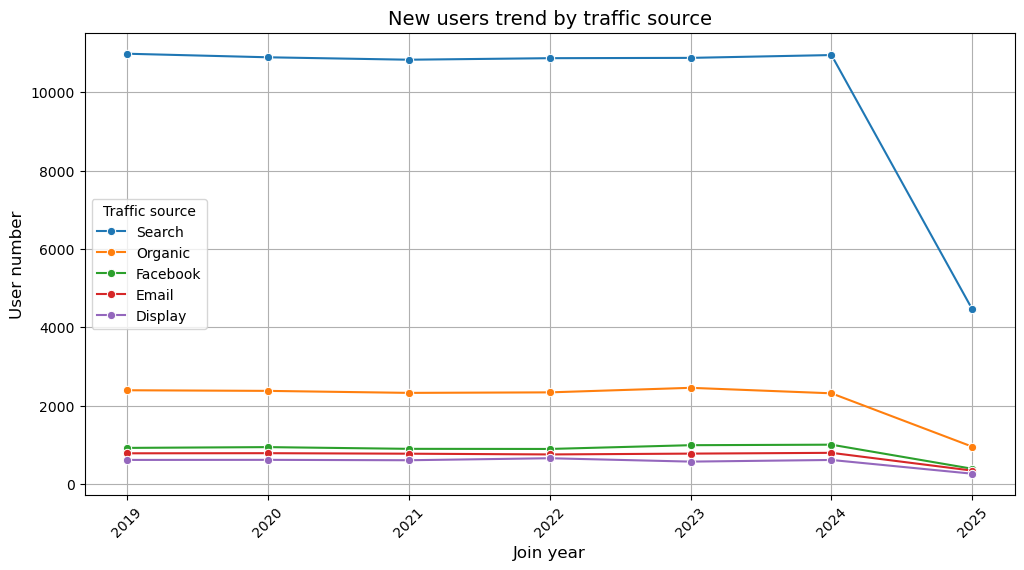

In [44]:
query_2 = """
SELECT
    traffic_source,
    COUNT(id) AS user_number,
    EXTRACT(YEAR FROM created_at) as join_year
FROM `bigquery-public-data.thelook_ecommerce.users`
GROUP BY join_year, traffic_source
ORDER BY join_year, user_number DESC;
"""

df_2 = execute_and_print_query(query_2)


plt.figure(figsize=(12, 6))  
sns.lineplot(data=df_2, x="join_year", y="user_number", hue="traffic_source", marker="o")

# Оформлення графіка
plt.title("New users trend by traffic source", fontsize=14)
plt.xlabel("Join year", fontsize=12)
plt.ylabel("User number", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Traffic source")
plt.grid(True)

# Показати графік
plt.show()

Висновок: найпопулярнішим джерелом трафіку із року в рік залишається "Пошук". Скоріш за все, наш маркетплейс ретельно працює над SEO оптимізацією, що дозволяє ефективно обробляти пошукові запити клієнтів та видавати сайт маркетплейсу в результатах пошуку.

### 2.4. Розподіл замовлених товарів за статусами по країнах у відсотках

,status,items_number,country
0,Shipped,18473,China
1,Complete,15208,China
2,Shipped,12568,United States
3,Processing,12158,China
4,Complete,10316,United States
...,...,...,...
66,Cancelled,2,Colombia
67,Returned,2,Colombia
68,Cancelled,2,España
69,Processing,2,Austria


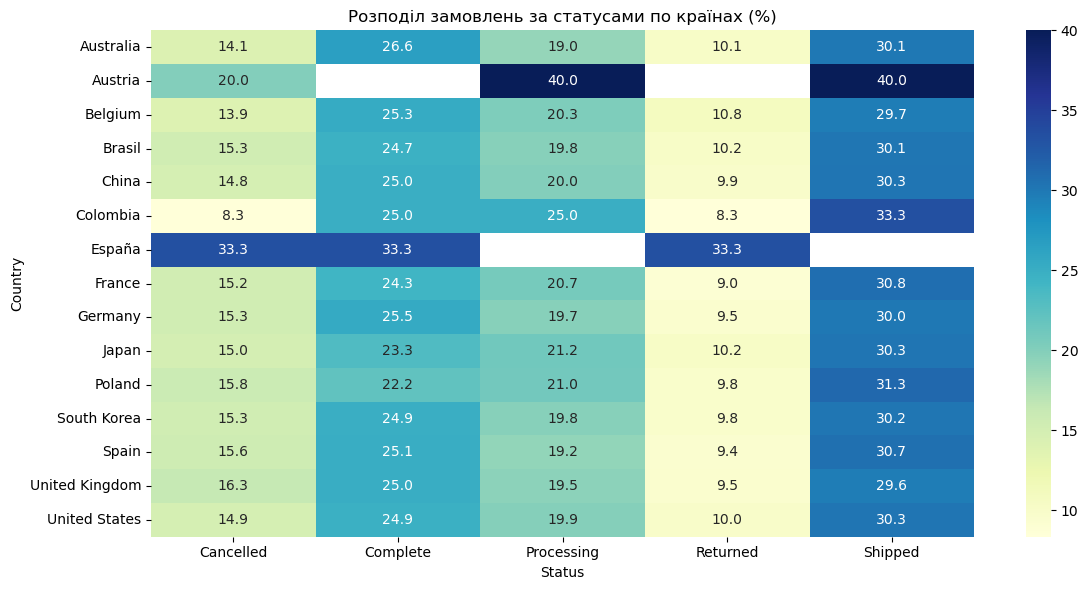

In [45]:
query_3 = """
SELECT
    oi.status,
    COUNT(oi.id) AS items_number,
    u.country
FROM `bigquery-public-data.thelook_ecommerce.order_items` oi
JOIN `bigquery-public-data.thelook_ecommerce.users` u
ON oi.user_id = u.id
GROUP BY country, status
ORDER BY items_number DESC;
"""

df_3 = execute_and_print_query(query_3)

# Pivot таблиця: кількість замовлень по країнах і статусах
heatmap_data = df_3.pivot(index='country', columns='status', values='items_number')

# Перетворення у float (щоб уникнути NAType)
heatmap_data = heatmap_data.astype('float')

# Розрахунок часток у % по кожній країні
heatmap_percent = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100

# Побудова теплової мапи у %
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_percent, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Розподіл замовлень за статусами по країнах (%)')
plt.xlabel('Status')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

1. Загальний розподіл по країнах досить стабільний - у більшості країн ми бачимо подібне співвідношення статусів:  
~15% — Cancelled  
~25% — Complete  
~20% — Processing  
~10% — Returned  
~30% — Shipped   
Це означає, що бізнес-процеси загалом працюють рівномірно по країнах.  

2. Аномально виглядають Австрія (66.7% — Returned, 33.3% — Complete) та Німеччина (100% замовлень — у статусі Cancelled). Це пов'язано з неймовірно низькою кількістю замовлених товарів у цих країнах.

Також досить сильно на фоні інших країн виділяється Колумбія, у якої відсоток повернень складає 30.4% (при середньому значення ~10%). Треба проаналізувати причини цих повернень: можливо на цей ринок часто поставляється бракований товар, або опис товару на сайті не співпадає з реальним товаром, тощо.

3. Найбільш стабільними ринками можна назвати США, Китай, Велику Британію, Південну Корею — вони мають дуже близький до середнього розподіл, без яскраво виражених аномалій. Це ознака стабільної роботи процесів у цих країнах.

4. Найбільший простір для оптимізації — статуси "Cancelled" та "Returned". У всіх країнах від 14% до 20% замовлень скасовуються або повертаються. Це значна частина втрат та недоотриманого прибутку.

### 2.5. Які категорії товарів в країнах найбільш популярні?

In [46]:
query_4 = """
SELECT
    p.category,
    u.country,
    COUNT(i.id) AS total_items,
    ROUND(SUM(i.sale_price)) AS total_sales
FROM `bigquery-public-data.thelook_ecommerce.order_items` i
JOIN
    `bigquery-public-data.thelook_ecommerce.products` p
ON i.product_id = p.id
JOIN
    `bigquery-public-data.thelook_ecommerce.users` u
ON i.user_id = u.id
WHERE i.status = 'Complete'
GROUP BY p.category, u.country
ORDER BY total_sales DESC;
"""

df_4 = execute_and_print_query(query_4)


import plotly.express as px
fig = px.treemap(df_4, path=['country', 'category'], values='total_sales',
                 title='Sales by Countries and Categories')
fig.show()


,category,country,total_items,total_sales
0,Outerwear & Coats,China,767,112044.0
1,Jeans,China,1082,105547.0
2,Outerwear & Coats,United States,545,84476.0
3,Jeans,United States,711,67484.0
4,Sweaters,China,890,66282.0
...,...,...,...,...
309,Jumpsuits & Rompers,Poland,1,11.0
310,Jumpsuits & Rompers,Belgium,1,9.0
311,Tops & Tees,Colombia,1,9.0
312,Active,Colombia,1,9.0


We can clearly see that the most popular categories in almost all countries are "Outerwear & Coats", "Sweaters", "Jeans" and "Swim".

### 2.6. Яка середня ціна товарів по категоріям та країнам?

,category,country,avg_price
0,Accessories,Colombia,110.00
1,Accessories,Australia,48.19
2,Accessories,Belgium,48.10
3,Accessories,South Korea,44.61
4,Accessories,United States,43.29
...,...,...,...
326,Underwear,South Korea,27.01
327,Underwear,United Kingdom,26.71
328,Underwear,Spain,26.60
329,Underwear,Germany,26.31


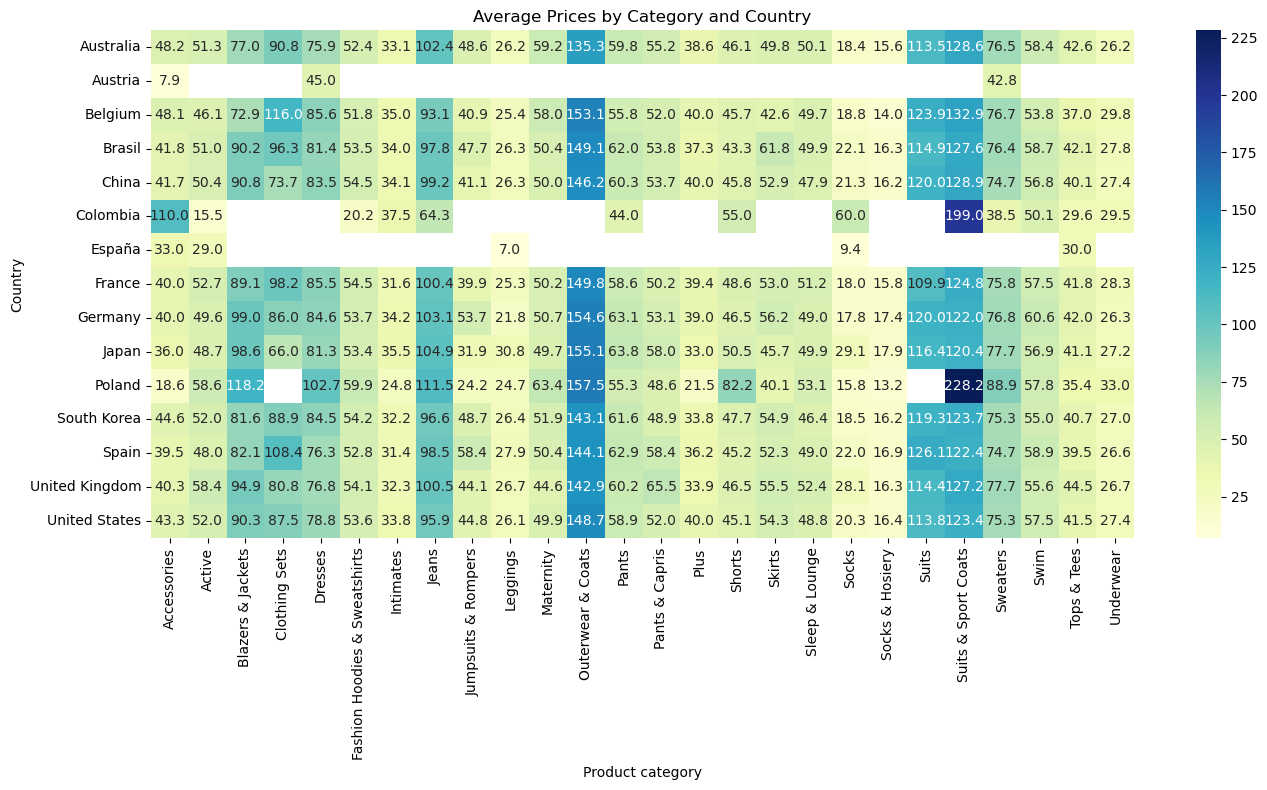

In [47]:
query_5 = """
SELECT
    p.category,                            
    u.country,                             
    ROUND(AVG(i.sale_price), 2) AS avg_price 
FROM `bigquery-public-data.thelook_ecommerce.order_items` i
JOIN `bigquery-public-data.thelook_ecommerce.products` p
    ON i.product_id = p.id
JOIN `bigquery-public-data.thelook_ecommerce.users` u
    ON i.user_id = u.id
GROUP BY u.country, p.category
ORDER BY p.category, avg_price DESC; 
"""

df_5 = execute_and_print_query(query_5)

pivot_df = df_5.pivot(index='country', columns='category', values='avg_price')

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Average Prices by Category and Country')
plt.xlabel('Product category')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


1. Найпопулярніша категорія «Outerwear & Coats» має найвищі середні ціни в усіх країнах. Німеччина, Японія та Польща мають найвищі ціни в цій категорії, тоді як продажі в цих країнах досить низькі. Це може означати, що нинішні ціни зависокі для місцевих жителів, і їх потрібно скоригувати відповідно до очікувань покупців.

2. Ми можемо спостерігати аномально високі ціни на більшість категорій у Польщі та Колумбії, що може бути причиною поганої цінової політики та причиною низьких обсягів продажів у цих країнах.

3. Найдешевші категорії в більшості країн: Socks, «Underwear», «Tops & Teesи» — це типовий низькомаржинальний товар. Їх слід продавати у великих обсягах або використовувати як «приманку» для залучення трафіку.

4. Австрія, Колумбія та Іспанія мають багато відсутніх значень - ці ринки можуть бути неактивними або слабо маркетуватись, що також призводить до низьких обсягів продажів.

### 2.7. Яким був середній чек у 2022 році та чи значуще він змінився у 2024 році?

In [48]:
# Знаходимо середнє значення чеку (замовлення), враховуючи вартість кожної окремої одиниці в замовленні
query_6 = """
WITH order_totals AS (
    SELECT 
        i.order_id,
        SUM(i.sale_price) AS total_sales_2022  
    FROM `bigquery-public-data.thelook_ecommerce.order_items` i
    JOIN `bigquery-public-data.thelook_ecommerce.orders` o
        ON i.order_id = o.order_id
    WHERE EXTRACT(YEAR FROM o.created_at) = 2022 and o.status = 'Complete'
    GROUP BY i.order_id
)
SELECT 
    ROUND(AVG(total_sales_2022),2) AS avg_order_value_2022
FROM order_totals;
"""

df_6 = execute_and_print_query(query_6)

,avg_order_value_2022
0,85.95


In [49]:
# Обираємо замовлення, які були здійснені у 2024 році
query_7 = """
SELECT 
    i.order_id,
    SUM(i.sale_price) AS total_sales_2024  
FROM `bigquery-public-data.thelook_ecommerce.order_items` i
JOIN `bigquery-public-data.thelook_ecommerce.orders` o
ON i.order_id = o.order_id
WHERE EXTRACT(YEAR FROM o.created_at) = 2024 and o.status = 'Complete'
GROUP BY i.order_id
"""

df_7 = execute_and_print_query(query_7)

,order_id,total_sales_2024
0,94487,0.020000
1,15976,1.500000
2,8951,325.810012
3,57160,105.710002
4,110335,26.720000
...,...,...
10834,104118,903.000000
10835,111127,903.000000
10836,122752,903.000000
10837,50170,990.000000


In [50]:
stat_analysis_2024 = df_7['total_sales_2024'].to_numpy()

In [51]:
from statsmodels.stats.weightstats import ztest

In [52]:
# Нульова гіпотеза (H0): Середній чек дорівнює 85.95 доларам
# Альтернативна гіпотеза (H1): Середній чек більше 85.95 доларів

null_mean = 85.95
alpha = 0.05

ztest_Score, p_value = ztest(stat_analysis_2024, value = null_mean, alternative='larger')

In [53]:
ztest_Score, p_value

(0.691131937927827, 0.24474131558804146)

In [54]:
if(p_value <  alpha):
    print("Відхилити Н0.")
else:
    print("Н0 не може бути відхилена.")

Н0 не може бути відхилена.


In [55]:
# Перевіримо середнє значення за 2024 рік через використання вбудованої функції
np.mean(stat_analysis_2024)

86.57357053728731

За 2022 рік середній чек замовлення становив 85.95, тоді як у 2024 році цей показник становить 86.57. Ця різниця дійсно є незначущою. Компанії слід продумати стратегію збільшення середнього чеку.

### 2.8. Які користувачі повертаються та здійснюють повторні покупки?

,user_id,total_orders
0,54693,4
1,75350,4
2,78638,4
3,94137,4
4,44607,4
...,...,...
30139,19225,2
30140,20846,2
30141,15140,2
30142,52577,2


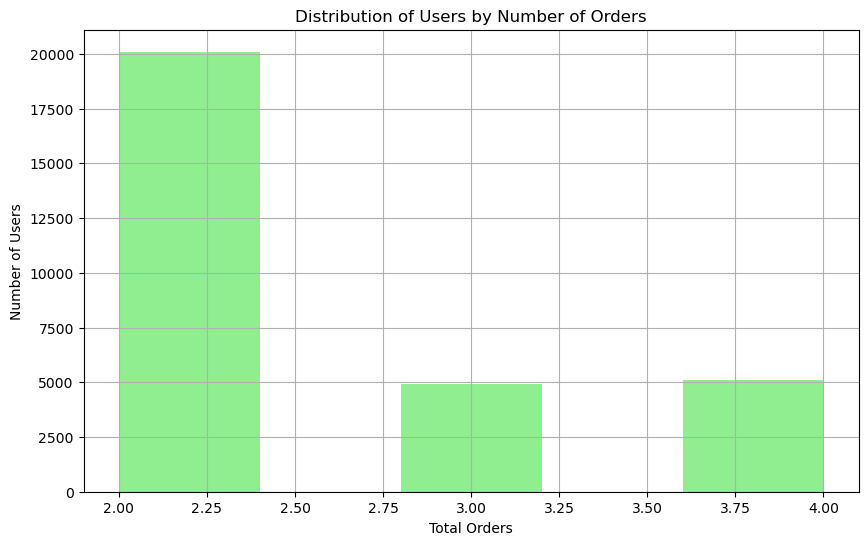

In [56]:
query_8 = """
SELECT 
    user_id,
    COUNT(DISTINCT order_id) AS total_orders
FROM `bigquery-public-data.thelook_ecommerce.order_items`
GROUP BY user_id
HAVING total_orders > 1
ORDER BY total_orders DESC;
"""

df_8 = execute_and_print_query(query_8)

plt.figure(figsize=(10, 6))
plt.hist(df_8['total_orders'], bins=5, color='lightgreen')
plt.title('Distribution of Users by Number of Orders')
plt.xlabel('Total Orders')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

Абсолютна більшість користувачів (20,000+) зробили рівно 2 замовлення. Це свідчить про те, що платформа добре стимулює перше повторне замовлення.

Але зростання після цього — значно знижується. Кількість користувачів із 3 і більше замовленнями значно нижча (по ~5,000). Це вказує на потенційну проблему утримання клієнтів після другого замовлення. Можливо, недостатньо персоналізованих пропозицій або програм лояльності.

### 2.9. Чи змінюється середній чек залежно від віку користувача?

In [57]:
query_9 = """
WITH order_totals AS (
    SELECT 
        o.order_id,
        u.id AS user_id,
        SUM(i.sale_price) AS order_value
    FROM `bigquery-public-data.thelook_ecommerce.order_items` i
    JOIN `bigquery-public-data.thelook_ecommerce.orders` o
        ON i.order_id = o.order_id
    JOIN `bigquery-public-data.thelook_ecommerce.users` u
        ON o.user_id = u.id
    WHERE o.status = 'Complete'
    GROUP BY o.order_id, u.id
),
user_age_groups AS (
    SELECT
        id AS user_id,
        CASE 
            WHEN age BETWEEN 10 AND 18 THEN '10-18'
            WHEN age BETWEEN 19 AND 24 THEN '19-24'
            WHEN age BETWEEN 25 AND 32 THEN '25-32'
            WHEN age BETWEEN 33 AND 45 THEN '33-45'
            ELSE '46+' 
        END AS age_group
    FROM `bigquery-public-data.thelook_ecommerce.users`
)
SELECT 
    u.age_group,
    ROUND(AVG(ot.order_value), 2) AS avg_order_value
FROM order_totals ot
JOIN user_age_groups u ON ot.user_id = u.user_id
GROUP BY u.age_group
ORDER BY u.age_group;
"""

df_9 = execute_and_print_query(query_9)

,age_group,avg_order_value
0,10-18,85.87
1,19-24,85.59
2,25-32,89.13
3,33-45,86.21
4,46+,86.28


Найвищий середній чек у групі 25–32 років ($89.13). Можливо, це основна група платоспроможних користувачів з активним стилем життя.

Найнижчий середній чек у віковій групі 19–24 ($85.59). Це може бути пов’язано з обмеженим доходом або більшим фокусом на знижки.

Загальний розрив між віковими групами невеликий, але відмінності все ж є і можуть використовуватись у маркетингових кампаніях.

### 2.10 Які дні тижня мають найвищі продажі?

,weekday_order,day_name,total_sales
0,1,Monday,1499371.83
1,2,Tuesday,1539689.63
2,3,Wednesday,1527650.60
3,4,Thursday,1544645.37
4,5,Friday,1611388.70
5,6,Saturday,1548459.05
6,7,Sunday,1535637.85


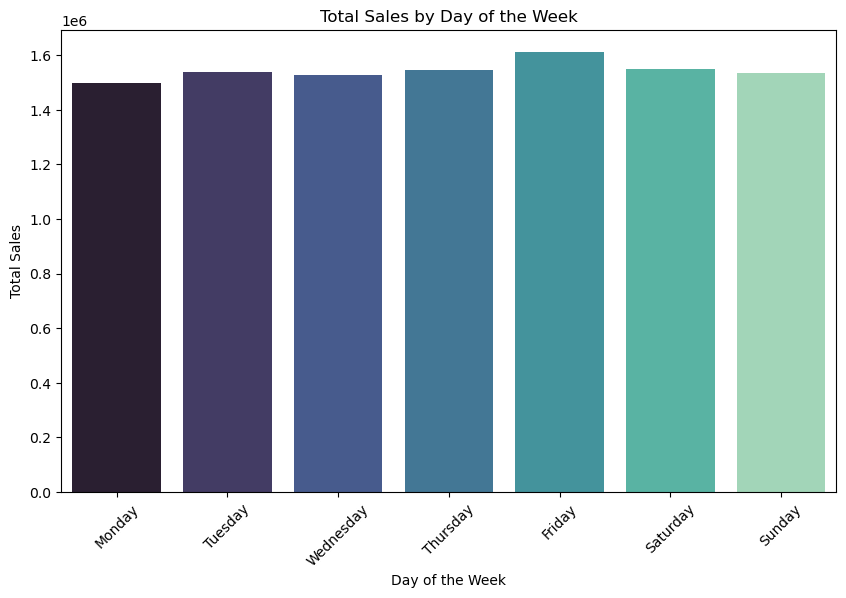

In [58]:
query_10 = """
SELECT 
    MOD(EXTRACT(DAYOFWEEK FROM DATE(o.created_at)) + 5, 7) + 1 AS weekday_order,
    FORMAT_DATE('%A', DATE(o.created_at)) AS day_name,
    ROUND(SUM(i.sale_price), 2) AS total_sales
FROM `bigquery-public-data.thelook_ecommerce.order_items` i
JOIN `bigquery-public-data.thelook_ecommerce.orders` o
ON i.order_id = o.order_id
GROUP BY weekday_order, day_name
ORDER BY weekday_order;
"""

df_10 = execute_and_print_query(query_10)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_10, x="day_name", y="total_sales", palette="mako")
plt.title("Total Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

Пік продажів припадає на п’ятницю, що робить цей день найприбутковішим тижня.

Найнижчі продажі — в понеділок. Це може свідчити про зниження активності після вихідних.

Загалом усі дні тижня мають досить рівномірні показники продажів, але робочі дні (особливо середина і кінець тижня) мають трохи вищу активність.

### 2.11. Який LTV користувачів за типами трафіку?

In [59]:
query_11 = """
WITH user_ltv AS (
  SELECT 
    u.id AS user_id,
    u.traffic_source,
    SUM(oi.sale_price) AS ltv
  FROM `bigquery-public-data.thelook_ecommerce.users` u
  JOIN `bigquery-public-data.thelook_ecommerce.orders` o
    ON u.id = o.user_id
  JOIN `bigquery-public-data.thelook_ecommerce.order_items` oi
    ON o.order_id = oi.order_id
  WHERE o.status = 'Complete'
  GROUP BY u.id, u.traffic_source
)

SELECT 
  traffic_source,
  COUNT(user_id) AS user_count,
  ROUND(AVG(ltv), 2) AS avg_ltv
FROM user_ltv
GROUP BY traffic_source
ORDER BY avg_ltv DESC;
"""

df_11 = execute_and_print_query(query_11)

,traffic_source,user_count,avg_ltv
0,Organic,4145,99.45
1,Facebook,1665,99.29
2,Search,19110,98.10
3,Display,1089,97.01
4,Email,1407,96.25


Найвищий середній LTV мають користувачі з каналу Organic — це свідчить про високу якість залучення аудиторії без платного просування.

Facebook також показує хороший результат, трохи поступаючись органіці, і має середній розмір аудиторії.

Канал Search залучає найбільшу кількість користувачів, але їхній LTV дещо нижчий. Тим не менш, через обсяг трафіку цей канал може залишатися ключовим драйвером доходу.

Display та Email мають найнижчий LTV, а також меншу кількість користувачів. Це може свідчити про потребу в оптимізації рекламних кампаній у цих каналах, або зміна фокусу на інші канали.

### 2.12. Сезонність — як змінюються замовлення протягом року?

,year_month,total_sales
0,2019-01,2513.66
1,2019-02,1686.99
2,2019-03,4368.30
3,2019-04,6953.28
4,2019-05,10243.21
...,...,...
70,2024-11,404706.48
71,2024-12,439754.92
72,2025-01,518013.95
73,2025-02,525684.73


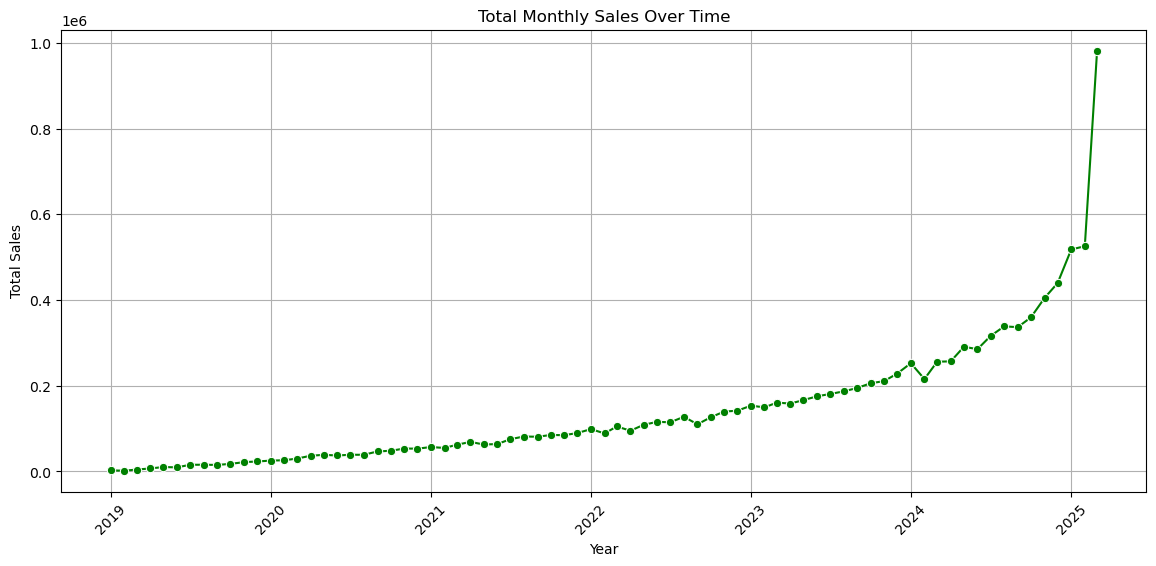

In [60]:
query_12 = """
SELECT 
  FORMAT_DATE('%Y-%m', DATE(o.created_at)) AS year_month,
  ROUND(SUM(i.sale_price), 2) AS total_sales
FROM `bigquery-public-data.thelook_ecommerce.order_items` i
JOIN `bigquery-public-data.thelook_ecommerce.orders` o
ON i.order_id = o.order_id
GROUP BY year_month
ORDER BY year_month;
"""

df_12 = execute_and_print_query(query_12)

df_12['year_month'] = pd.to_datetime(df_12['year_month'])

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_12, x='year_month', y='total_sales', marker='o', color='green')

plt.title('Total Monthly Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

З 2019 по 2023 рік спостерігається стійке та поступове зростання продажів, що може свідчити про стабільний розвиток бізнесу, успішне залучення клієнтів та розширення асортименту.
Починаючи з кінця 2023 року, видно різке зростання продажів, з піком на початку 2025 року.
У першому місяці 2025 року продажі майже вдвічі перевищили попередні місяці, що може бути наслідком запуску нової маркетингової кампанії, великого оновлення продукту або сезонного сплеску (наприклад, розпродаж чи свята).

### 2.13. Який відсоток повернень мають різні категорії товарів?

,category,returned_items,total_items,return_rate
0,Pants & Capris,370,3481,10.63
1,Maternity,549,5213,10.53
2,Clothing Sets,22,210,10.48
3,Blazers & Jackets,339,3258,10.41
4,Pants,756,7262,10.41
5,Underwear,764,7514,10.17
6,Jeans,1294,12749,10.15
7,Plus,438,4358,10.05
8,Suits,106,1061,9.99
9,Accessories,984,9858,9.98


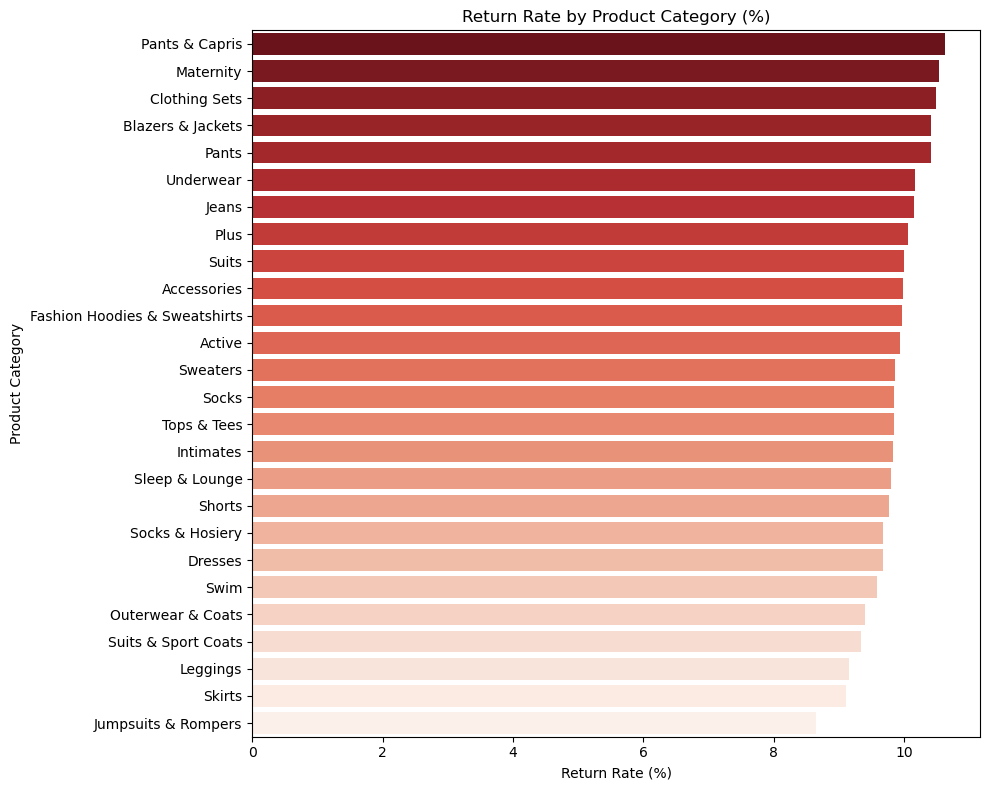

In [61]:
query_13 = """
SELECT
  p.category,
  COUNT(CASE WHEN oi.status = 'Returned' THEN 1 END) AS returned_items,
  COUNT(oi.id) AS total_items,
  ROUND(COUNT(CASE WHEN oi.status = 'Returned' THEN 1 END) * 100.0 / COUNT(oi.id), 2) AS return_rate
FROM `bigquery-public-data.thelook_ecommerce.order_items` oi
JOIN `bigquery-public-data.thelook_ecommerce.products` p
  ON oi.product_id = p.id
GROUP BY p.category
ORDER BY return_rate DESC;
"""

df_13 = execute_and_print_query(query_13)

plt.figure(figsize=(10, 8))
sns.barplot(
    data=df_13,
    x='return_rate',
    y='category',
    palette='Reds_r'
)
plt.title('Return Rate by Product Category (%)')
plt.xlabel('Return Rate (%)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

Деякі категорії товарів мають суттєво вищий відсоток повернень, що може свідчити про проблеми з розмірами, очікуваннями покупців або якістю.

Топ категорій з найвищим рівнем повернень:  
- Pants & Capris – 10.63%  
- Maternity – 10.53%  
- Clothing Sets – 10.48%  
- Blazers & Jackets – 10.41%  
- Pants – 10.41%  

Це означає, що кожне десяте замовлення у цих категоріях повертається.

# 3. Висновки та Рекомендації

1. Динаміка продажів  
Загальний обсяг продажів стабільно зростає з кожним роком.
У 2024–2025 роках зафіксовано різкий стрибок продажів, що може свідчити про вдалі маркетингові кампанії, розширення аудиторії або оптимізацію операційних процесів.

Рекомендація: проаналізувати конкретні фактори росту, включаючи канали просування, нові лінійки товарів або цінову політику у 2024 році.

2. Активність по країнах  
Найбільше замовлень та дохід приносять Китай, США, Бразилія.
Водночас існують країни з низьким обсягом замовлень, які потенційно можна розвивати (наприклад, Польща, Колумбія, Австрія).

Рекомендація: сфокусуватись на локалізованому маркетингу у регіонах із високим потенціалом, а також оптимізувати логістику у вже успішних регіонах.

3. Середній чек  
Найвищий середній чек зафіксовано у віковій категорії 25–32 років (~89.13$).
Середній чек майже не відрізняється між віковими групами, але саме молоді дорослі купують активніше.

Рекомендація: спрямувати більше маркетингу на аудиторію 25–32 років, з урахуванням їх купівельної спроможності.

4. Сезонність та дні тижня  
Найвищі продажі відбуваються в п’ятницю та суботу. Це вказує на підвищену активність перед вихідними.

Рекомендація: планувати розсилки, акції та запуск нових продуктів саме в ці дні для максимального охоплення.

5. Аналіз каналів залучення (LTV)  
Найвищий середній LTV — у користувачів, що прийшли через Organic (99.45$), далі — Facebook, Search. Найнижчий — у Display та Email трафіку.

Рекомендація: перерозподілити маркетинговий бюджет, зменшивши інвестиції в Display/Email, і збільшити SEO/контент-маркетинг для органіки.

6. Відсоток повернень  
Категорії з найвищим return rate: Pants & Capris, Maternity, Clothing Sets (понад 10%). Категорії з найменшим відсотком повернень — Jumpsuits & Rompers, Skirts.

Рекомендація: дослідити причини повернень (проблеми з розмірами, якістю), покращити фото, описи, розмірні сітки, а також оптимізувати категорії з високим поверненням.

7. Повторні покупки  
Переважна більшість користувачів робить 2 замовлення, менша частина — 3 і більше. Потенціал росту полягає у стимулюванні повторних замовлень.

Рекомендація: впровадити програми лояльності, ремаркетинг та персональні пропозиції для користувачів після першої покупки.